In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/dataset/Train'
valid_path = '/content/drive/MyDrive/dataset/Test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/dataset/Train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 21,905,186 (83.56 MB)

 Trainable params: 102,402 (400.01 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 808 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 129 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.8930 - loss: 0.7106 - val_accuracy: 0.5349 - val_loss: 12.1657
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 195s 3s/step - accuracy: 0.8846 - loss: 1.1911 - val_accuracy: 0.6047 - val_loss: 8.5774
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.9210 - loss: 0.5449 - val_accuracy: 0.7209 - val_loss: 4.9052
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.8901 - loss: 1.0464 - val_accuracy: 0.7287 - val_loss: 4.9131
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.9042 - loss: 0.9722 - val_accuracy: 0.7519 - val_los

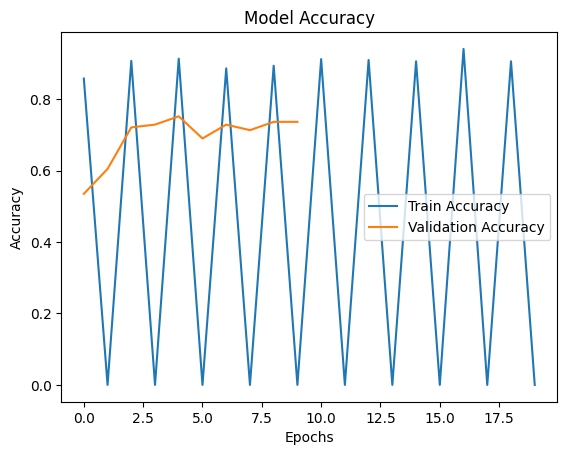

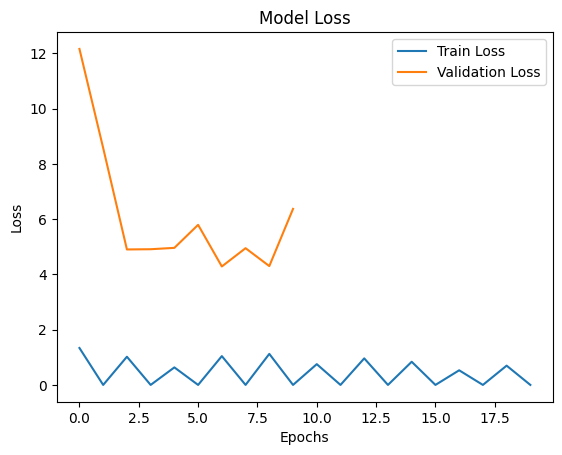

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set, steps=len(test_set))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.7299 - loss: 6.2878
Test Accuracy: 73.64%


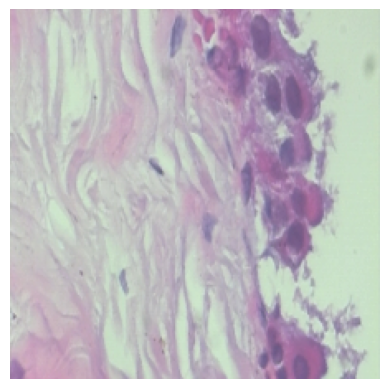

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction: [[9.9999571e-01 4.2753823e-06]]


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the test image
test_image_path = '/content/drive/MyDrive/dataset/Test/Benign/SOB_B_A-14-22549AB-400-001.png'  # Replace with a valid image path

# Load and preprocess the image
img = image.load_img(test_image_path, target_size=(224, 224))  # Resize to (224, 224)
plt.imshow(img)
plt.axis('off')
plt.show()

# Convert to array and normalize
img_array = image.img_to_array(img)  # Convert to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize

# Predict
prediction = model.predict(img_array)
print(f"Prediction: {prediction}")


In [ ]:
model.save('breast_cancer_model.h5')
print("Model saved as 'breast_cancer_model.h5'")


Model saved as 'breast_cancer_model.h5'


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('breast_cancer_model.h5')
print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict the labels for the test set
y_pred = model.predict(test_set, steps=len(test_set))
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices
y_true = test_set.classes  # True labels

# Generate the classification report
print(classification_report(y_true, y_pred_classes, target_names=test_set.class_indices.keys()))


5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step
              precision    recall  f1-score   support

      Benign       0.38      0.20      0.27        64
   Malignant       0.46      0.68      0.55        65

    accuracy                           0.44       129
   macro avg       0.42      0.44      0.41       129
weighted avg       0.42      0.44      0.41       129



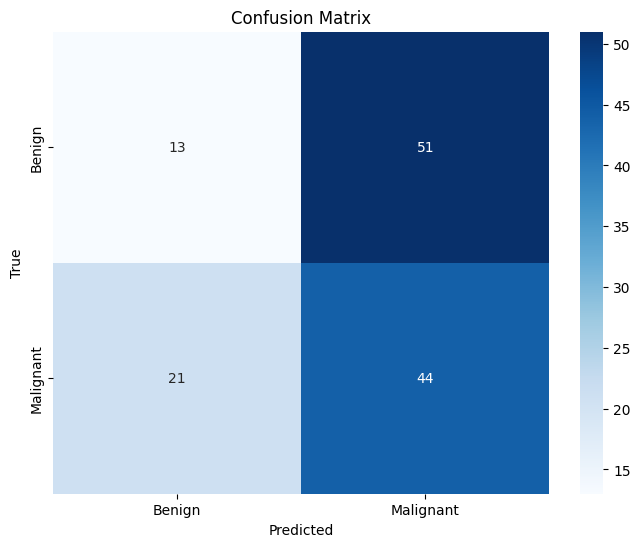

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_set.class_indices.keys(), yticklabels=test_set.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Save the model
model.save('breast_cancer_model.h5')
print("Model saved successfully!")

Model saved successfully!


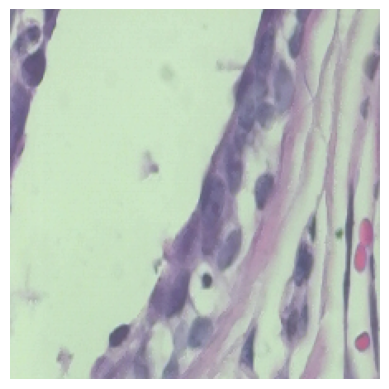

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
Prediction: [[9.9999571e-01 4.2753823e-06]]
Predicted Label: Benign


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to a new image
img_path = '/content/drive/MyDrive/dataset/Test/Benign/SOB_B_A-14-22549AB-400-007.png'

# Load the image and resize it to the input size expected by the model
img = image.load_img(img_path, target_size=(224, 224))  # Adjust size if needed
plt.imshow(img)
plt.axis('off')
plt.show()

# Predict
prediction = model.predict(img_array)
print(f"Prediction: {prediction}")

# Get the predicted class index
predicted_class_index = np.argmax(prediction)

# Convert the prediction to a class label
class_labels = ['Benign', 'Malignant'] # Assuming these are your class labels in order
predicted_label = class_labels[predicted_class_index]

print(f"Predicted Label: {predicted_label}")


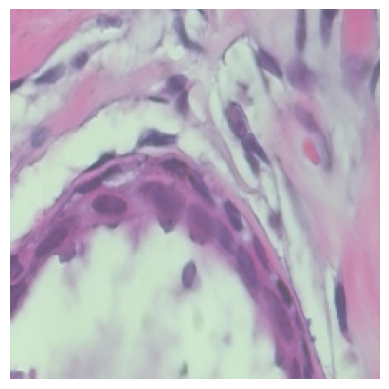

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Predicted probability: 0.9937708973884583
Predicted Label: Malignant


In [ ]:
# Import necessary libraries
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the test image
test_image_path = '/content/drive/MyDrive/dataset/Test/Benign/SOB_B_A-14-22549AB-400-003.png'  # Replace this with your image path

# Preprocess the image
img = image.load_img(test_image_path, target_size=(224, 224))  # Resize to model's expected input size
plt.imshow(img)
plt.axis('off')
plt.show()

# Convert image to numpy array and normalize
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize pixel values

# Make the prediction
prediction = model.predict(img_array)  # Model should be loaded or trained already

# Handle binary classification
try:
    # For binary classification (one output neuron with sigmoid activation)
    predicted_probability = prediction[0][0]  # Extract predicted probability
    predicted_label = "Malignant" if predicted_probability > 0.5 else "Benign"
    print(f"Predicted probability: {predicted_probability}")
    print(f"Predicted Label: {predicted_label}")
except IndexError:
    # Handle multi-class classification with np.argmax
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    class_labels = ["Benign", "Malignant"]  # Change this list if you have more classes
    predicted_label = class_labels[predicted_class_index]
    print(f"Predicted class index: {predicted_class_index}")
    print(f"Predicted Label: {predicted_label}")


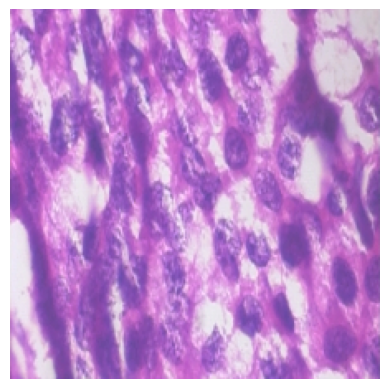

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Predicted probability: 6.465470082824392e-27
Predicted Label: Benign


In [ ]:
# Import necessary libraries
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the test image
test_image_path = '/content/drive/MyDrive/dataset/Test/Malignant/SOB_M_DC-14-2773-400-032.png'  # Replace this with your image path

# Preprocess the image
img = image.load_img(test_image_path, target_size=(224, 224))  # Resize to model's expected input size
plt.imshow(img)
plt.axis('off')
plt.show()

# Convert image to numpy array and normalize
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize pixel values

# Make the prediction
prediction = model.predict(img_array)  # Model should be loaded or trained already

# Handle binary classification
try:
    # For binary classification (one output neuron with sigmoid activation)
    predicted_probability = prediction[0][0]  # Extract predicted probability
    predicted_label = "Malignant" if predicted_probability > 0.5 else "Benign"
    print(f"Predicted probability: {predicted_probability}")
    print(f"Predicted Label: {predicted_label}")
except IndexError:
    # Handle multi-class classification with np.argmax
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    class_labels = ["Benign - Non Cancerous", "Malignant - Cancerous"]
    predicted_label = class_labels[predicted_class_index]
    print(f"Predicted class index: {predicted_class_index}")
    print(f"Predicted Label: {predicted_label}")


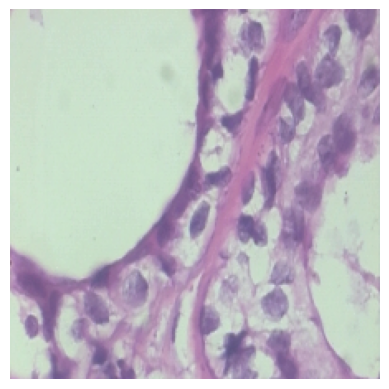

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Predicted probability: 0.9997889399528503
Predicted Label: Malignant


In [ ]:
# Import necessary libraries
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the test image
test_image_path = '/content/drive/MyDrive/dataset/Test/Malignant/SOB_M_DC-14-2773-400-017.png'  # Replace this with your image path

# Preprocess the image
img = image.load_img(test_image_path, target_size=(224, 224))  # Resize to model's expected input size
plt.imshow(img)
plt.axis('off')
plt.show()

# Convert image to numpy array and normalize
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize pixel values

# Make the prediction
prediction = model.predict(img_array)  # Model should be loaded or trained already

# Handle binary classification
try:
    # For binary classification (one output neuron with sigmoid activation)
    predicted_probability = prediction[0][0]  # Extract predicted probability
    predicted_label = "Malignant" if predicted_probability > 0.5 else "Benign"
    print(f"Predicted probability: {predicted_probability}")
    print(f"Predicted Label: {predicted_label}")
except IndexError:
    # Handle multi-class classification with np.argmax
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    class_labels = ["Benign - Non Cancerous", "Malignant - Cancerous"]
    predicted_label = class_labels[predicted_class_index]
    print(f"Predicted class index: {predicted_class_index}")
    print(f"Predicted Label: {predicted_label}")


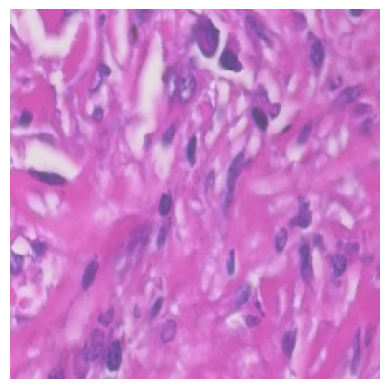

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Predicted probability: 4.5692934259282115e-17
Predicted Label: Benign


In [ ]:
# Import necessary libraries
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the test image
test_image_path = '/content/drive/MyDrive/dataset/Test/Malignant/SOB_M_DC-14-4372-400-009.png'  # Replace this with your image path

# Preprocess the image
img = image.load_img(test_image_path, target_size=(224, 224))  # Resize to model's expected input size
plt.imshow(img)
plt.axis('off')
plt.show()

# Convert image to numpy array and normalize
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize pixel values

# Make the prediction
prediction = model.predict(img_array)  # Model should be loaded or trained already

# Handle binary classification
try:
    # For binary classification (one output neuron with sigmoid activation)
    predicted_probability = prediction[0][0]  # Extract predicted probability
    predicted_label = "Malignant" if predicted_probability > 0.5 else "Benign"
    print(f"Predicted probability: {predicted_probability}")
    print(f"Predicted Label: {predicted_label}")
except IndexError:
    # Handle multi-class classification with np.argmax
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    class_labels = ["Benign - Non Cancerous", "Malignant - Cancerous"]
    predicted_label = class_labels[predicted_class_index]
    print(f"Predicted class index: {predicted_class_index}")
    print(f"Predicted Label: {predicted_label}")


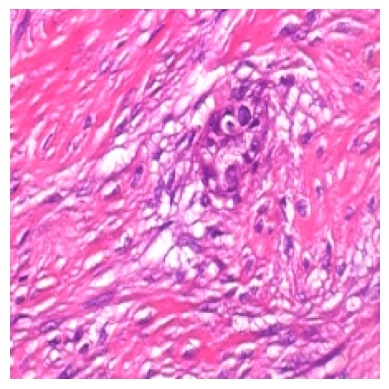

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Predicted probability: 4.028107923659263e-06
Predicted Label: Benign


In [ ]:
# Import necessary libraries
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the test image
test_image_path = '/content/drive/MyDrive/dataset/Test/Malignant/SOB_M_DC-14-2985-400-009.png'  # Replace this with your image path

# Preprocess the image
img = image.load_img(test_image_path, target_size=(224, 224))  # Resize to model's expected input size
plt.imshow(img)
plt.axis('off')
plt.show()

# Convert image to numpy array and normalize
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize pixel values

# Make the prediction
prediction = model.predict(img_array)  # Model should be loaded or trained already

# Handle binary classification
try:
    # For binary classification (one output neuron with sigmoid activation)
    predicted_probability = prediction[0][0]  # Extract predicted probability
    predicted_label = "Malignant" if predicted_probability > 0.5 else "Benign"
    print(f"Predicted probability: {predicted_probability}")
    print(f"Predicted Label: {predicted_label}")
except IndexError:
    # Handle multi-class classification with np.argmax
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    class_labels = ["Benign - Non Cancerous", "Malignant - Cancerous"]
    predicted_label = class_labels[predicted_class_index]
    print(f"Predicted class index: {predicted_class_index}")
    print(f"Predicted Label: {predicted_label}")


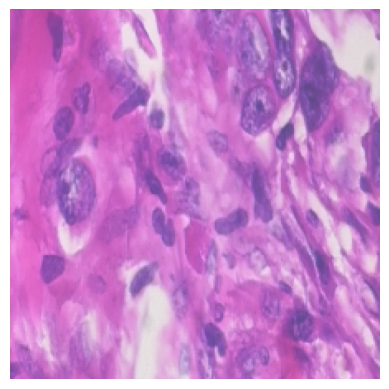

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Predicted probability: 1.463498636929684e-28
Predicted Label: Benign


In [ ]:
# Import necessary libraries
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the test image
test_image_path = '/content/drive/MyDrive/dataset/Test/Malignant/SOB_M_DC-14-4372-400-012.png'  # Replace this with your image path

# Preprocess the image
img = image.load_img(test_image_path, target_size=(224, 224))  # Resize to model's expected input size
plt.imshow(img)
plt.axis('off')
plt.show()

# Convert image to numpy array and normalize
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize pixel values

# Make the prediction
prediction = model.predict(img_array)  # Model should be loaded or trained already

# Handle binary classification
try:
    # For binary classification (one output neuron with sigmoid activation)
    predicted_probability = prediction[0][0]  # Extract predicted probability
    predicted_label = "Malignant" if predicted_probability > 0.5 else "Benign"
    print(f"Predicted probability: {predicted_probability}")
    print(f"Predicted Label: {predicted_label}")
except IndexError:
    # Handle multi-class classification with np.argmax
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    class_labels = ["Benign - Non Cancerous", "Malignant - Cancerous"]
    predicted_label = class_labels[predicted_class_index]
    print(f"Predicted class index: {predicted_class_index}")
    print(f"Predicted Label: {predicted_label}")


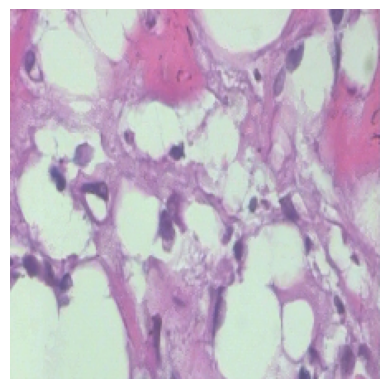

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
Predicted probability: 5.056719098670758e-34
Predicted Label: Benign


In [ ]:
# Import necessary libraries
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the test image
test_image_path = '/content/drive/MyDrive/dataset/Test/Benign/SOB_B_A-14-22549G-400-013.png'  # Replace this with your image path

# Preprocess the image
img = image.load_img(test_image_path, target_size=(224, 224))  # Resize to model's expected input size
plt.imshow(img)
plt.axis('off')
plt.show()

# Convert image to numpy array and normalize
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize pixel values

# Make the prediction
prediction = model.predict(img_array)  # Model should be loaded or trained already

# Handle binary classification
try:
    # For binary classification (one output neuron with sigmoid activation)
    predicted_probability = prediction[0][0]  # Extract predicted probability
    predicted_label = "Malignant" if predicted_probability > 0.5 else "Benign"
    print(f"Predicted probability: {predicted_probability}")
    print(f"Predicted Label: {predicted_label}")
except IndexError:
    # Handle multi-class classification with np.argmax
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    class_labels = ["Benign - Non Cancerous", "Malignant - Cancerous"]
    predicted_label = class_labels[predicted_class_index]
    print(f"Predicted class index: {predicted_class_index}")
    print(f"Predicted Label: {predicted_label}")


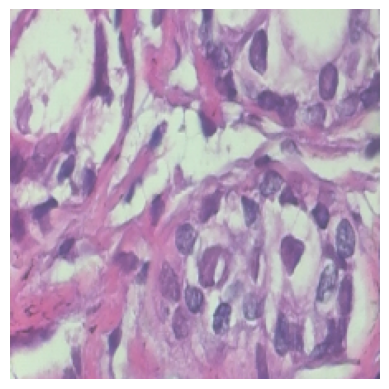

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Predicted probability: 0.9958751797676086
Predicted Label: Malignant


In [ ]:
# Import necessary libraries
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the test image
test_image_path = '/content/drive/MyDrive/dataset/Test/Benign/SOB_B_A-14-22549G-400-006.png'  # Replace this with your image path

# Preprocess the image
img = image.load_img(test_image_path, target_size=(224, 224))  # Resize to model's expected input size
plt.imshow(img)
plt.axis('off')
plt.show()

# Convert image to numpy array and normalize
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize pixel values

# Make the prediction
prediction = model.predict(img_array)  # Model should be loaded or trained already

# Handle binary classification
try:
    # For binary classification (one output neuron with sigmoid activation)
    predicted_probability = prediction[0][0]  # Extract predicted probability
    predicted_label = "Malignant" if predicted_probability > 0.5 else "Benign"
    print(f"Predicted probability: {predicted_probability}")
    print(f"Predicted Label: {predicted_label}")
except IndexError:
    # Handle multi-class classification with np.argmax
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    class_labels = ["Benign - Non Cancerous", "Malignant - Cancerous"]
    predicted_label = class_labels[predicted_class_index]
    print(f"Predicted class index: {predicted_class_index}")
    print(f"Predicted Label: {predicted_label}")


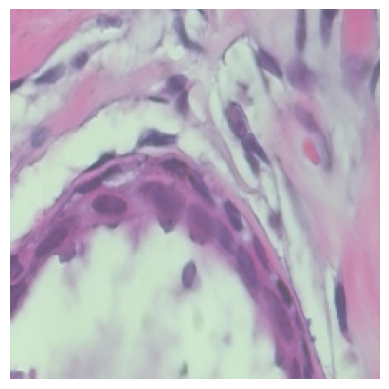

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
Predicted probability: 0.9937708973884583
Predicted Label: Malignant


In [36]:
# Import necessary libraries
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the test image
test_image_path = '/content/drive/MyDrive/dataset/Test/Benign/SOB_B_A-14-22549AB-400-003.png'  # Replace this with your image path

# Preprocess the image
img = image.load_img(test_image_path, target_size=(224, 224))  # Resize to model's expected input size
plt.imshow(img)
plt.axis('off')
plt.show()

# Convert image to numpy array and normalize
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize pixel values

# Make the prediction
prediction = model.predict(img_array)  # Model should be loaded or trained already

# Handle binary classification
try:
    # For binary classification (one output neuron with sigmoid activation)
    predicted_probability = prediction[0][0]  # Extract predicted probability
    predicted_label = "Malignant" if predicted_probability > 0.5 else "Benign"
    print(f"Predicted probability: {predicted_probability}")
    print(f"Predicted Label: {predicted_label}")
except IndexError:
    # Handle multi-class classification with np.argmax
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    class_labels = ["Benign", "Malignant"]  # Change this list if you have more classes
    predicted_label = class_labels[predicted_class_index]
    print(f"Predicted class index: {predicted_class_index}")
    print(f"Predicted Label: {predicted_label}")
